In [25]:
%matplotlib inline

from IPython import display
from ipywidgets import widgets
import numpy as np
import matplotlib.pyplot as plt
import time
from pynq.pmods import Grove_FingerHR 

display.display(widgets.HTML("Inserisci la tua età"))
text = widgets.Textarea()
display.display(text)


display.display(widgets.HTML("Seleziona il sesso"))
buttonGender = widgets.RadioButtons(options = ["maschio", "femmina"])
display.display(buttonGender)



display.display(widgets.HTML("Sei una persona atletica?"))
buttonAthl = widgets.RadioButtons (options = ["sì", "no"])
display.display(buttonAthl)



In [26]:
l = list ()
def on_button_clicked(b):
    global freq

    # initialize finger clip heart rate sensor on PMOD 1 (JB) and grove id 4 (GR4).
    # PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE

    fingerHR = Grove_FingerHR(1, 4)

    # NOTE:
# if you need to perform asynchronous logging use:
# - fingerHR.start_log(ms) - where ms is the logging interval in ms
# - fingerHR.get_log() - to get the result and stop logging

# read heart rate
    start=time.time()
    while(True):
        try:
            value = fingerHR.read()
            display.clear_output(wait=True)
            print(str(value) + " heart beats per minute")
            if time.time()-start >60:
                print("Ora puoi fermare la misurazione premendo il tasto stop")
            else:
                print("Continua a misurare")
            time.sleep(0.5)
        except KeyboardInterrupt:
        # exit without showing errors if the stop button in Jupyter is pressed
            break
            
        if (value != 0 ) and (value < 250):
            l.append(value)
        
        
      
        
 
    
    
    
button = widgets.Button(description = "Inizia la misurazione! ")
display.display(button)
button.on_click(on_button_clicked)    
    





48 heart beats per minute
Continua a misurare


[44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 46, 46, 46, 46, 46, 47, 47]
La tua frequenza è : 45
La tua frequenza cardiaca massima è: 186
Attenzione! Frequenza cardiaca troppo bassa
Sei in una condizione di sforzo minimo


AttributeError: 'numpy.ndarray' object has no attribute 'append'

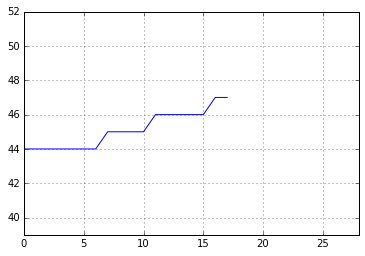

In [29]:
def MEDIA (lista):
    somma = 0
    
    for i in lista:
        somma+= i
    media = somma / len(lista)
    return media

minimo = int(min(l))
massimo=int(max(l))
print(l)
xVal = np.arange(0, len(l), 1)
yVal=l
plt.plot(xVal, yVal)
plt.xlabel = ("Numero misurazioni")
plt.axis([ 0, (len(l) + 10),minimo - 5, massimo + 5])
        #plt.ylabel = ("Frequenza cardiaca [bpm]")
plt.grid(True)
plt.show

freq = int(MEDIA(l))
print("La tua frequenza è : "  + str (freq)) 
    


def FCMAX (s, a):
    if s == "femmina":
        fm = 226 - a
    else:
        fm = 220 - a
    print("La tua frequenza cardiaca massima è: " + str(fm))
    return fm

age = int(text.value)
gender = buttonGender.value
athl = buttonAthl.value

FCmax = FCMAX(gender, age)



a = int(FCmax)*0.9
b = int(FCmax)*1.1
if freq < b and freq > a:
    print("Attenzione! Stai per superare la tua frequenza massima")
if freq < a and freq> 50:
    print("Valore nella norma")
if freq < 50:
    print("Attenzione! Frequenza cardiaca troppo bassa")
if freq > b:
    print("Attenzione! Frequenza cardiaca troppo alta")
    
    
    
    
#facciamo un bottone per far scegliere al paziente se vuole verificare la sua soglia di sforzo 
    
if freq < 0.60*FCmax:
    print("Sei in una condizione di sforzo minimo")
if (freq < 0.65*FCmax and freq > 0.6*FCmax) or (athl == "sì" and freq > 0.6*FCmax and freq < 0.8*FCmax):
    print("Sei in una condizione di sforzo aerobico")
if (athl == "sì" and freq > 0.8*FCmax) or (athl=="no" and freq >0.65*FCmax):
    print("Sei in una condizione di sforzo anaerobico")
    
    
    
misurazioni = list()

tot = np.load("Misurazioni.npy")
misurazioni = tot.append(freq)
np.save("Misurazioni", misurazioni)

print(tot)
print(misurazioni)

